In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

In [2]:
def spring(start, end, nodes, width):
    # https://nrsyed.com/2018/10/07/a-function-for-plotting-a-2d-spring/
    """!
    Return a list of points corresponding to a spring.
    @param r1 (array-like) The (x, y) coordinates of the first endpoint.
    @param r2 (array-like) The (x, y) coordinates of the second endpoint.
    @param nodes (int) The number of spring "nodes" or coils.
    @param width (int or float) The diameter of the spring.
    @return An array of x coordinates and an array of y coordinates.
    """

    # Check that nodes is at least 1.
    nodes = max(int(nodes), 1)

    # Convert to numpy array to account for inputs of different types/shapes.
    start, end = np.array(start).reshape((2,)), np.array(end).reshape((2,))

    # If both points are coincident, return the x and y coords of one of them.
    if (start == end).all():
        return start[0], start[1]

    # Calculate length of spring (distance between endpoints).
    length = np.linalg.norm(np.subtract(end, start))

    # Calculate unit vectors tangent (u_t) and normal (u_t) to spring.
    u_t = np.subtract(end, start) / length
    u_n = np.array([[0, -1], [1, 0]]).dot(u_t)

    # Initialize array of x (row 0) and y (row 1) coords of the nodes+2 points.
    spring_coords = np.zeros((2, nodes + 2))
    spring_coords[:,0], spring_coords[:,-1] = start, end

    # Check that length is not greater than the total length the spring
    # can extend (otherwise, math domain error will result), and compute the
    # normal distance from the centerline of the spring.
    normal_dist = np.sqrt(max(0, width**2 - (length**2 / nodes**2))) / 2

    # Compute the coordinates of each point (each node).
    for i in range(1, nodes + 1):
        spring_coords[:,i] = (
            start
            + ((length * (2 * i - 1) * u_t) / (2 * nodes))
            + (normal_dist * (-1)**i * u_n))

    return spring_coords[0,:], spring_coords[1,:]


In [34]:
xy = np.array([[5,0],[5,1],[5,2],[5,3],[5,4],[5,5]])
len(xy)

6

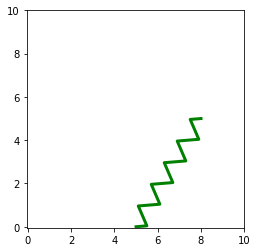

In [76]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], c="green", lw=3)
#ln2, = ax.scatter([],[], c='b', s=50)

def init():
    ax.set_xticks(np.arange(0,11,2))
    ax.set_yticks(np.arange(0,11,2))
    ax.set_aspect("equal", "box")
    return ln,

def update(frame):
    xdata = np.array([5, 0]) #xdata.append(frame)
    if frame<6:
        ydata = np.array([5, frame]) #ydata.append(np.sin(frame))
        ln.set_data(*spring(xdata, ydata,10,1))
    else:
        ydata = np.array([8, frame-1]) #ydata.append(np.sin(frame))
        ln.set_data(*spring(xdata, ydata,10,1))
    #ln2.set_data(5,frame)
    return ln,

ani = matplotlib.animation.FuncAnimation(fig, update, frames=np.arange(0,7,1),
                    init_func=init, blit=True)
HTML(ani.to_jshtml())

In [62]:
list(xy2)

[5, 5]

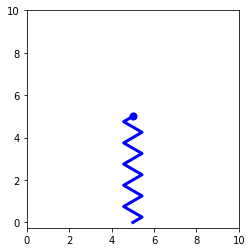

In [65]:
fig, ax = plt.subplots()

xy1 = np.array([5, 0]) # origin
xy2 = np.array([5, 5])
x = np.array([xy1[0],xy2[0]])
y = np.array([xy1[1],xy2[1]])

ax.plot(*spring(xy1,xy2,10,1), c="blue", lw=3)
ax.scatter(xy2[0],xy2[1], c='b', s=50)
ax.set_xticks(np.arange(0,11,2))
ax.set_yticks(np.arange(0,11,2))
ax.set_aspect("equal", "box")

plt.show()

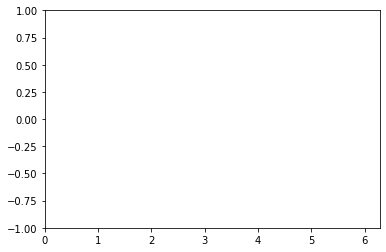

In [33]:


t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    #print(x[:i])
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

#plt.show()

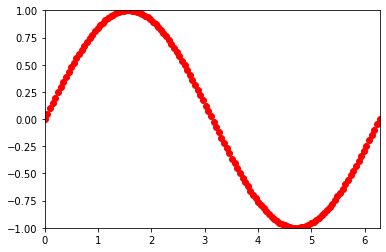

In [13]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
HTML(ani.to_jshtml())

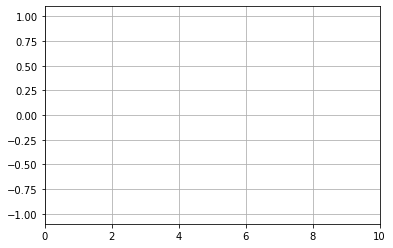

In [10]:



def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, interval=10, init_func=init)
from IPython.display import HTML
HTML(ani.to_jshtml())